# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [4]:
print(cities)

['saskylakh', 'barao de melgaco', 'albany', 'hamilton', 'tuktoyaktuk', 'abu zabad', 'butaritari', 'tasiilaq', 'tari', 'atuona', 'mount isa', 'rikitea', 'ponta do sol', 'cape town', 'qaqortoq', 'namibe', 'mataura', 'sao gabriel da cachoeira', 'castro', 'bluff', 'new norfolk', 'orlik', 'punta arenas', 'qaanaaq', 'lompoc', 'sitka', 'vaini', 'luderitz', 'changping', 'port alfred', 'ushuaia', 'hobart', 'codrington', 'eirunepe', 'cusuna', 'mackenzie', 'port lincoln', 'sinnamary', 'maua', 'klaksvik', 'andenes', 'mys shmidta', 'esperance', 'marsh harbour', 'hermanus', 'chokurdakh', 'tiksi', 'teguise', 'hilo', 'torrington', 'thompson', 'bredasdorp', 'bage', 'sharjah', 'winkler', 'taolanaro', 'hasaki', 'belyy yar', 'bonavista', 'amderma', 'arraial do cabo', 'nordby', 'busselton', 'hambantota', 'mahibadhoo', 'zhanaozen', 'ternate', 'barentsburg', 'lensk', 'dingle', 'hohhot', 'peniche', 'quatre cocos', 'severo-kurilsk', 'carnarvon', 'yagodnoye', 'yellowknife', 'oytal', 'ratnagiri', 'mar del plata'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f'{url}appid={api_key}&units={units}&q='
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=36ad1341a12fbbc418a9724a013b4769&units=metric&q=


In [50]:
#testing requests
q2 = query_url + "arraial do cabo"
r2 = requests.get(q2).json()
print(r2['name'])

Arraial do Cabo


In [125]:
# Loop through the list of cities and perform a request for data on each
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

city1 = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
temp = []
max_temp = []
wind_speed = []

for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        name = response['name']
        city1.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

        print(f'Processing Record: {cities.index(city)+1} of {len(cities)} |  {name}')

    except (ValueError,KeyError):
        print("City not found. Skipping")

print("-----------------------------")
print("Data Retrieval Complete   ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record: 1 of 635 |  Saskylakh
Processing Record: 2 of 635 |  Barao de Melgaco
Processing Record: 3 of 635 |  Albany
Processing Record: 4 of 635 |  Hamilton
Processing Record: 5 of 635 |  Tuktoyaktuk
Processing Record: 6 of 635 |  Abu Zabad
Processing Record: 7 of 635 |  Butaritari
Processing Record: 8 of 635 |  Tasiilaq
Processing Record: 9 of 635 |  Tari
Processing Record: 10 of 635 |  Atuona
Processing Record: 11 of 635 |  Mount Isa
Processing Record: 12 of 635 |  Rikitea
Processing Record: 13 of 635 |  Ponta do Sol
Processing Record: 14 of 635 |  Cape Town
Processing Record: 15 of 635 |  Qaqortoq
Processing Record: 16 of 635 |  Namibe
Processing Record: 17 of 635 |  Mataura
Processing Record: 18 of 635 |  Sao Gabriel da Cachoeira
Processing Record: 19 of 635 |  Castro
Processing Record: 20 of 635 |  Bluff
Processing Record: 21 of 635 |  New Norfolk
Processing Record: 22 of 635 |  Orlik
Pr

City not found. Skipping
Processing Record: 204 of 635 |  Upernavik
Processing Record: 205 of 635 |  Georgetown
Processing Record: 206 of 635 |  Hofn
Processing Record: 207 of 635 |  Te Anau
Processing Record: 208 of 635 |  Vostok
Processing Record: 209 of 635 |  Nassjo
Processing Record: 210 of 635 |  Beloha
City not found. Skipping
Processing Record: 212 of 635 |  Los Llanos de Aridane
Processing Record: 213 of 635 |  Kodiak
Processing Record: 214 of 635 |  Liwale
Processing Record: 215 of 635 |  Dzaoudzi
Processing Record: 216 of 635 |  Bodden Town
Processing Record: 217 of 635 |  Katherine
Processing Record: 218 of 635 |  Honningsvag
Processing Record: 219 of 635 |  Boyolangu
Processing Record: 220 of 635 |  Porto Walter
Processing Record: 221 of 635 |  Viedma
Processing Record: 222 of 635 |  Itarema
Processing Record: 223 of 635 |  Coquimbo
Processing Record: 224 of 635 |  Robertson
City not found. Skipping
Processing Record: 226 of 635 |  Acajutla
Processing Record: 227 of 635 | 

Processing Record: 407 of 635 |  Cabedelo
Processing Record: 408 of 635 |  Roald
Processing Record: 409 of 635 |  Alofi
Processing Record: 410 of 635 |  Necochea
Processing Record: 411 of 635 |  Aasiaat
Processing Record: 412 of 635 |  Puro
Processing Record: 413 of 635 |  Kavaratti
Processing Record: 414 of 635 |  Kasongo
Processing Record: 415 of 635 |  Kununurra
Processing Record: 416 of 635 |  Paso de Carrasco
City not found. Skipping
Processing Record: 418 of 635 |  Reo
Processing Record: 419 of 635 |  Maceio
Processing Record: 420 of 635 |  Acapulco
Processing Record: 421 of 635 |  Zapolyarnyy
Processing Record: 422 of 635 |  Sumbe
Processing Record: 423 of 635 |  Les Cayes
Processing Record: 424 of 635 |  Gangarampur
Processing Record: 425 of 635 |  Mpika
Processing Record: 426 of 635 |  Bela pod Bezdezem
Processing Record: 427 of 635 |  Williamsport
Processing Record: 428 of 635 |  Cowra
Processing Record: 429 of 635 |  Fortuna
City not found. Skipping
Processing Record: 431 of

Processing Record: 607 of 635 |  Praia da Vitoria
Processing Record: 608 of 635 |  Samsun
Processing Record: 609 of 635 |  Okhotsk
Processing Record: 610 of 635 |  Arlit
City not found. Skipping
Processing Record: 612 of 635 |  Kochki
Processing Record: 613 of 635 |  Aksarka
Processing Record: 614 of 635 |  Soto
Processing Record: 615 of 635 |  Galveston
Processing Record: 616 of 635 |  Battle Creek
City not found. Skipping
Processing Record: 618 of 635 |  Gazojak
Processing Record: 619 of 635 |  Annau
Processing Record: 620 of 635 |  Santa Maria
Processing Record: 621 of 635 |  Rio Gallegos
Processing Record: 622 of 635 |  Shalakusha
Processing Record: 623 of 635 |  Imbituba
Processing Record: 624 of 635 |  Lampa
Processing Record: 625 of 635 |  Xining
Processing Record: 626 of 635 |  Mayo
Processing Record: 627 of 635 |  Baillif
Processing Record: 628 of 635 |  Vinh
Processing Record: 629 of 635 |  Atar
Processing Record: 630 of 635 |  Ketchikan
City not found. Skipping
Processing Re

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
weather_dict = {
    "City": city1,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    #"Temp": temp,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}


In [142]:
weather_pd = pd.DataFrame(weather_dict)
weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,22,RU,1563513817,37,71.97,114.09,17.58,3.36
1,Barao de Melgaco,0,BR,1563513817,64,-16.19,-55.97,24.00,1.00
2,Albany,90,US,1563513816,78,42.65,-73.75,22.00,2.10
3,Hamilton,20,CA,1563513737,100,43.26,-79.87,25.00,2.60
4,Tuktoyaktuk,5,CA,1563513817,82,69.44,-133.03,14.00,4.10


In [143]:
weather_pd.to_csv(
    "weather_dataframe.csv", encoding="utf-8", index=False)

# Visualize
weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,22,RU,1563513817,37,71.97,114.09,17.58,3.36
1,Barao de Melgaco,0,BR,1563513817,64,-16.19,-55.97,24.00,1.00
2,Albany,90,US,1563513816,78,42.65,-73.75,22.00,2.10
3,Hamilton,20,CA,1563513737,100,43.26,-79.87,25.00,2.60
4,Tuktoyaktuk,5,CA,1563513817,82,69.44,-133.03,14.00,4.10


In [144]:
print(weather_pd.count())

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64


In [145]:
weather_data_original = pd.read_csv(
    "weather_dataframe.csv", dtype="object", encoding="utf-8")

# Visualize
#weather_data_original.head()

#print(weather_data_original.count())

City          571
Cloudiness    571
Country       570
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64


In [131]:
weather_data_pd = pd.DataFrame(weather_data_original)
weather_data_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,22,RU,1563513817,37,71.97,114.09,17.58,3.36
1,Barao de Melgaco,0,BR,1563513817,64,-16.19,-55.97,24.0,1.0
2,Albany,90,US,1563513816,78,42.65,-73.75,22.0,2.1
3,Hamilton,20,CA,1563513737,100,43.26,-79.87,25.0,2.6
4,Tuktoyaktuk,5,CA,1563513817,82,69.44,-133.03,14.0,4.1
5,Abu Zabad,41,SD,1563513818,64,12.35,29.25,26.88,4.34
6,Butaritari,26,KI,1563513818,66,3.07,172.79,29.18,2.11
7,Tasiilaq,19,GL,1563513818,100,65.61,-37.64,4.0,1.0
8,Tari,100,NG,1563513818,79,12.41,4.49,25.08,6.25
9,Atuona,1,PF,1563513819,67,-9.8,-139.03,26.68,1.85


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [148]:
lat_max = weather_pd["Lat"].max()
lat_min = weather_pd["Lat"].min()
maxt_max = weather_pd["Max Temp"].max()
maxt_min = weather_pd["Max Temp"].min()

print(lat_max)
print(lat_min)
print(maxt_max)
print(maxt_min)

78.22
-54.81
42.58
-1.11


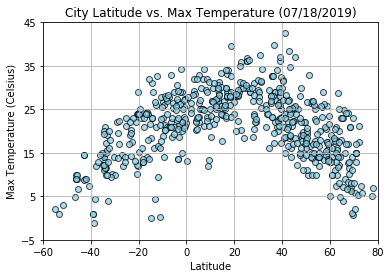

In [156]:
# Build a scatter plot for each data type
plt.scatter(x=weather_pd["Lat"], y=weather_pd["Max Temp"], marker="o", alpha=0.7, 
            edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
#x = [-60,80]

plt.ylim((maxt_min,maxt_max+1))
plt.xlim((lat_min,lat_max+1))
plt.yticks(np.arange(-5,45+1, 10.0))
plt.xticks(np.arange(-60,90+1, 20.0))
plt.grid(True)



plt.title("City Latitude vs. Max Temperature (07/18/2019)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("MaxTemperatureInWorldCities.png")

# Show plot
plt.show()

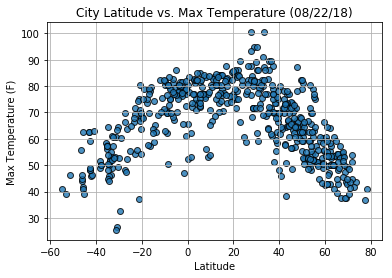

#### Latitude vs. Humidity Plot

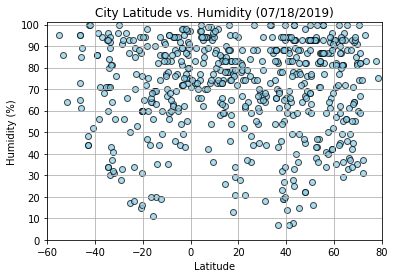

In [157]:
# Build a scatter plot for each data type
plt.scatter(x=weather_pd["Lat"], y=weather_pd["Humidity"], marker="o", alpha=0.7, 
            edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
#x = [-60,80]

plt.ylim((0,100+1))
plt.xlim((lat_min,lat_max+1))
plt.yticks(np.arange(0,100+1, 10.0))
plt.xticks(np.arange(-60,90+1, 20.0))
plt.grid(True)



plt.title("City Latitude vs. Humidity (07/18/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

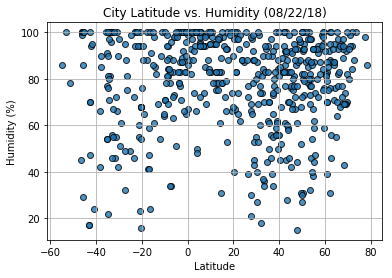

#### Latitude vs. Cloudiness Plot

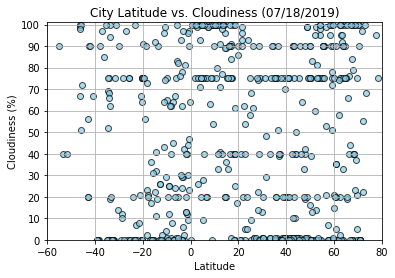

In [158]:
# Build a scatter plot for each data type
plt.scatter(x=weather_pd["Lat"], y=weather_pd["Cloudiness"], marker="o", alpha=0.7, 
            edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
#x = [-60,80]

plt.ylim((0,100+1))
plt.xlim((lat_min,lat_max+1))
plt.yticks(np.arange(0,100+1, 10.0))
plt.xticks(np.arange(-60,90+1, 20.0))
plt.grid(True)



plt.title("City Latitude vs. Cloudiness (07/18/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

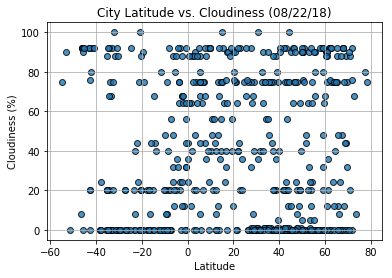

#### Latitude vs. Wind Speed Plot

In [159]:
ws_max = weather_pd["Wind Speed"].max()
ws_min = weather_pd["Wind Speed"].min()

print(ws_max)
print(ws_min)

16.65
0.1


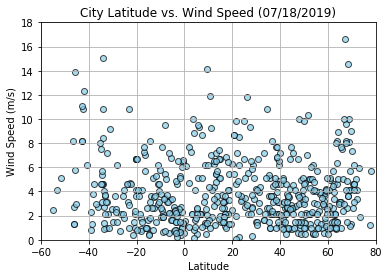

In [164]:
# Build a scatter plot for each data type
plt.scatter(x=weather_pd["Lat"], y=weather_pd["Wind Speed"], marker="o", alpha=0.7, 
            edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
#x = [-60,80]

plt.ylim((ws_min,ws_max+1))
plt.xlim((lat_min,lat_max+1))
plt.yticks(np.arange(0,18+1, 2.0))
plt.xticks(np.arange(-60,90+1, 20.0))
plt.grid(True)



plt.title("City Latitude vs. Wind Speed (07/18/2019)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

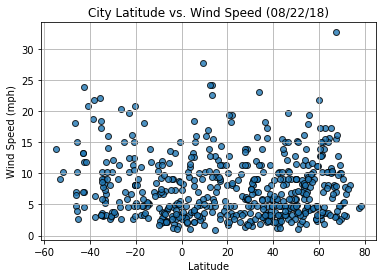